**importing module**

In [38]:
import torch
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

**Loading  and analysis of dataset**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/IRIS.csv')
print(df.shape)
print(df.head())
print()
print(df.tail())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [5]:
#information abot the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Data preprocessing**

In [7]:
#checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Explolatoty test**

Histograms

<Axes: >

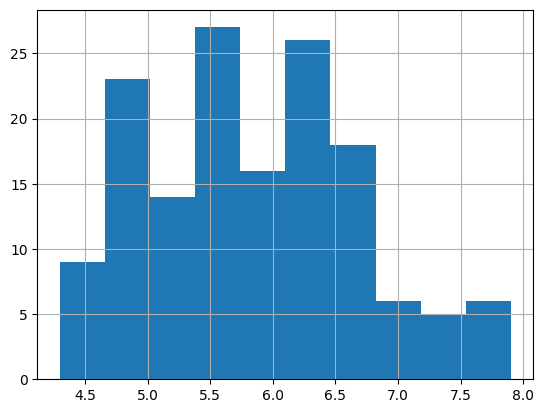

In [8]:
df['sepal_length'].hist()

<Axes: >

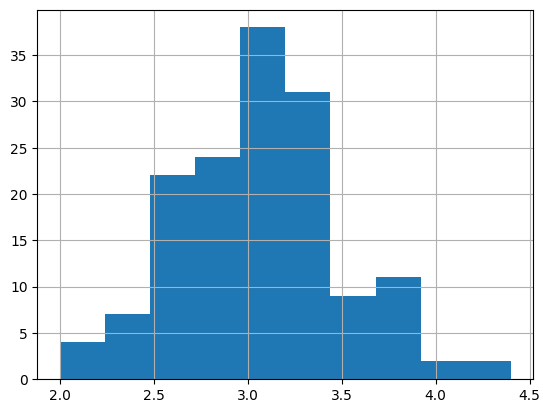

In [9]:
df['sepal_width'].hist()

<Axes: >

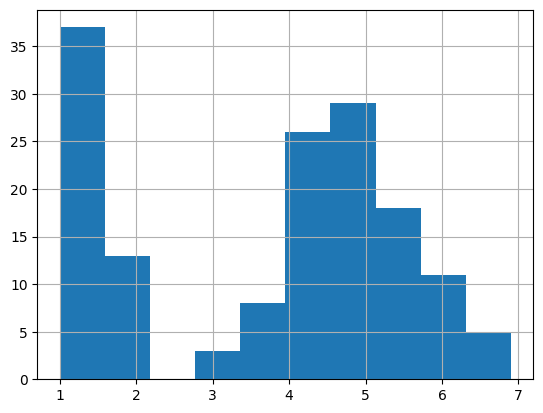

In [10]:
df['petal_length'].hist()

<Axes: >

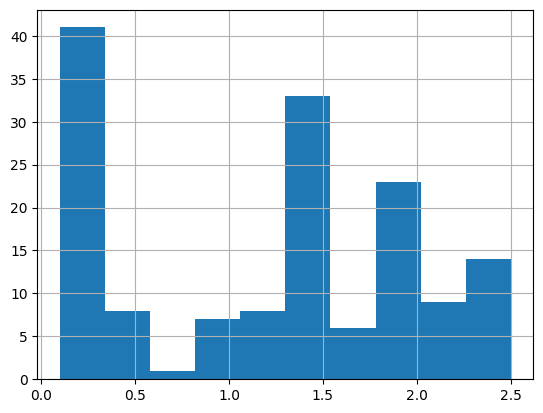

In [11]:
df['petal_width'].hist()

**Scatter plot**

In [14]:
colors=['red','green','blue' ]
species=[ 'Iris-setosa','Iris-versicolo','Iris-virginica']
unique_species = df['species'].unique()
print(unique_species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


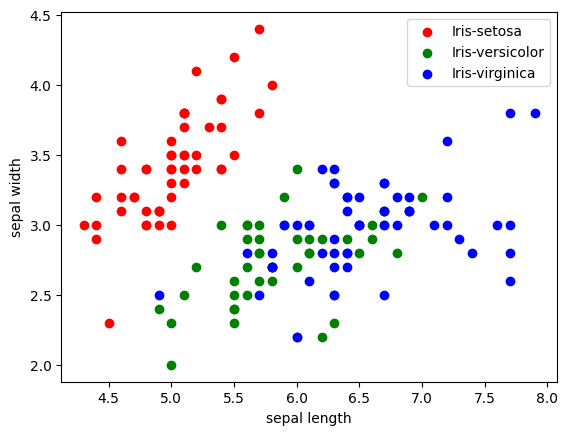

In [25]:
from matplotlib import legend
for i in range(len(unique_species) ):
  x=df[df['species']==unique_species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=unique_species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

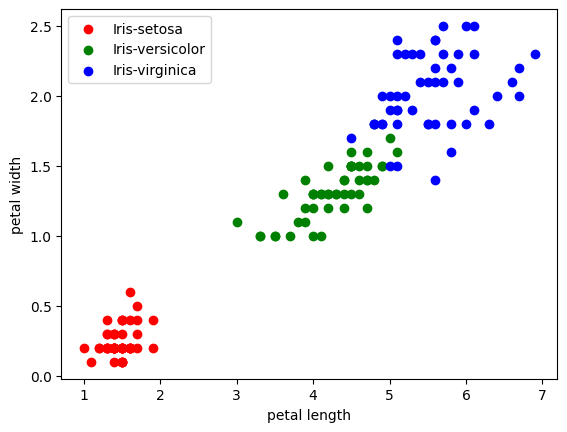

In [23]:
for i in range(len(unique_species)):
  x = df[df['species'] == unique_species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = unique_species[i])

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

**Corelation matrix**


In [28]:
df.corr()

<ipython-input-28-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-34-a9825840677d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

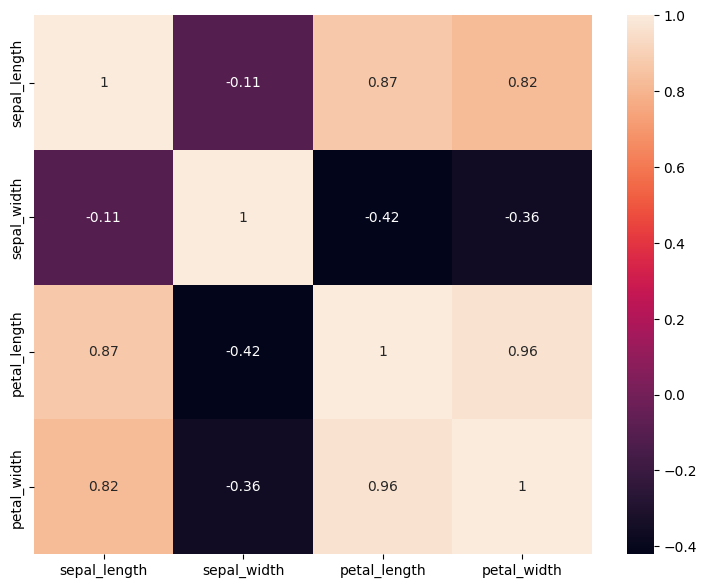

In [34]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(9,7))
sns.heatmap(corr,annot=True)

Label Encoder


In [36]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [37]:
df['species']=le.fit_transform(df['species'])
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

Training the MOdel

In [92]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [97]:
x=df.drop(columns=['species'])
y=df['species']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)


In [98]:
#working with the Logistic Regression model

model= LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

In [99]:
#perfomance metric

# Replace 'model' with your actual model
y_pred = model.predict(x_test)

#Accuracy
print('Accuracy: ',accuracy_score(y_test,y_pred)*100)

#precision
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))

#F1 score
print('F!_Score: ',f1_score(y_test,y_pred,average='weighted'))

Accuracy:  100.0
Precision:  1.0
F!_Score:  1.0


In [100]:
#working with KNN
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
#perfomance metric

# Replace 'model' with your actual model
y_pred = model.predict(x_test)

#Accuracy
print('Accuracy: ',accuracy_score(y_test,y_pred)*100)

#precision
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))

#F1 score
print('F!_Score: ',f1_score(y_test,y_pred,average='weighted'))

Accuracy:  100.0
Precision:  1.0
F!_Score:  1.0


In [102]:
#Working with Naive bayes
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [103]:
#perfomance metric

# Replace 'model' with your actual model
y_pred = model.predict(x_test)

#Accuracy
print('Accuracy: ',accuracy_score(y_test,y_pred)*100)

#precision
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))

#F1 score
print('F!_Score: ',f1_score(y_test,y_pred,average='weighted'))


Accuracy:  97.77777777777777
Precision:  0.9792592592592592
F!_Score:  0.9777493969064851
